In [104]:
import json
import numpy as np 

def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'experiment1.2_ASIF_CKA/retrieval_wav2vec2_layer{j}_glove_layer{h}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 


In [105]:
asif_glove = np.zeros(12)

for i in range(12):
    asif_glove[i] = get_accuracy_top1(j=i, h=0, p=6, k=250)[0]

In [106]:
with open('experiment1.1_CCA_CKA/cka_glove_wav2vec2.json', 'r', encoding='utf-8') as file:
    wav_vs_glove = json.load(file)

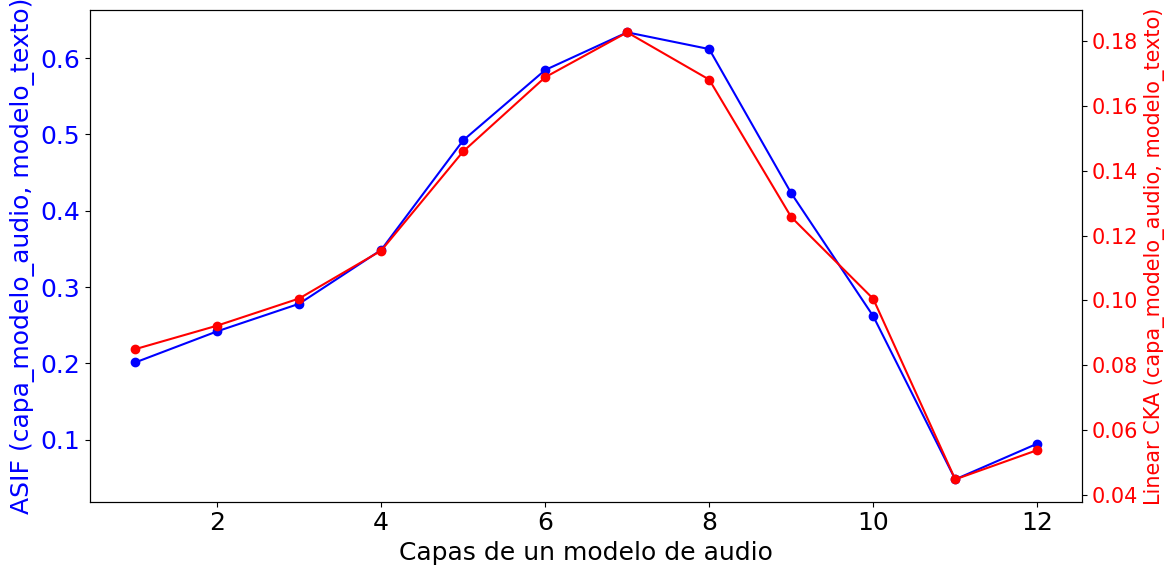

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the provided plots
layers = np.arange(1, 13)
wav_vs_glove_CCA = [0.4552785903820065,
 0.46515271583991935,
 0.4728577455210156,
 0.4856241870508816,
 0.52264089080444,
 0.5624277531077105,
 0.5898141105294815,
 0.5775077350128057,
 0.5430461697056727,
 0.49564927266548353,
 0.45973128155226173,
 0.4576064483370868]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Set global font size
plt.rcParams.update({'font.size': 15})  # You can change '14' to any other size

# ax1.plot(layers, wav_vs_glove_CCA, 'g-o', label='C Kernel Alignment (CCA)')
# ax1.set_ylabel('CCA', color='g')
# ax1.tick_params(axis='y', labelcolor='g')

# Plot ASIF
ax1.plot(layers, asif_glove, 'b-o', label='ASIF (Accuracy Zero-shot)')
ax1.set_xlabel("Capas de un modelo de audio")
ax1.set_ylabel('ASIF (capa_modelo_audio, modelo_texto)' , color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Linear CKA
ax2 = ax1.twinx()
ax2.plot(layers, wav_vs_glove, 'r-o', label='Linear Centered Kernel Alignment')

ax2.set_ylabel('Linear CKA (capa_modelo_audio, modelo_texto)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a third y-axis for CCA
# ax3 = ax1.twinx()
# ax3.plot(layers, wav_vs_glove_CCA, 'g-o', label='CCA')
# ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
# ax3.set_ylabel('CCA', color='g')
# ax3.tick_params(axis='y', labelcolor='g')
fig.tight_layout()
plt.show()


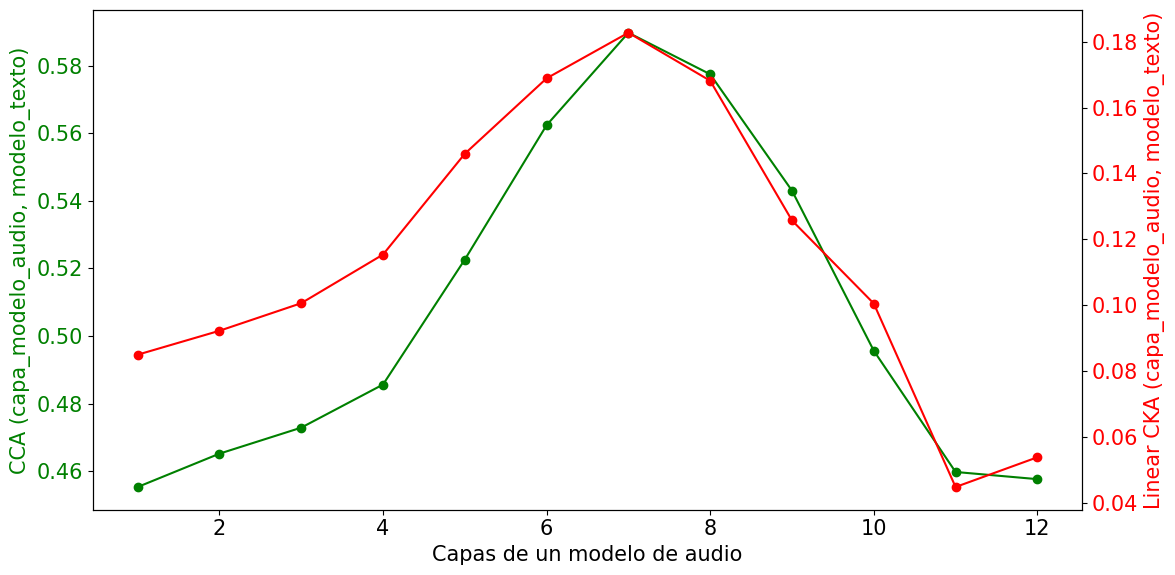

In [114]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set global font size
plt.rcParams.update({'font.size': 15})  # You can change '14' to any other size

ax1.plot(layers, wav_vs_glove_CCA, 'g-o', label='CCA')
ax1.set_xlabel("Capas de un modelo de audio")
ax1.set_ylabel('CCA (capa_modelo_audio, modelo_texto)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis for Linear CKA
ax2 = ax1.twinx()
ax2.plot(layers, wav_vs_glove, 'r-o', label='Linear CKA')
ax2.set_ylabel('Linear CKA (capa_modelo_audio, modelo_texto)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


fig.tight_layout()
plt.show()

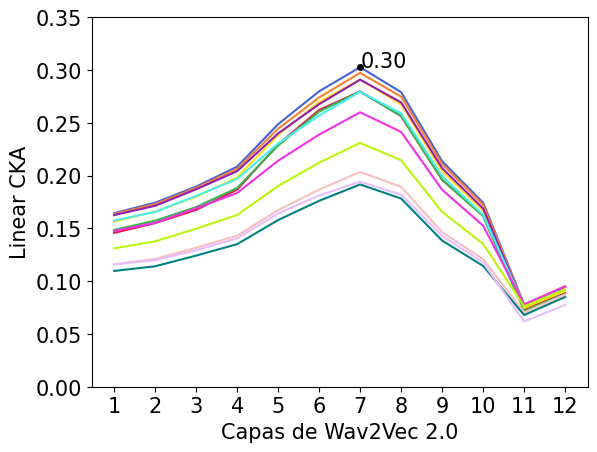

In [112]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
colors = [
    '#e6194B',  # bright red
    '#3cb44b',  # bright green
    '#ffe119',  # bright yellow
    '#4363d8',  # bright blue
    '#f58231',  # bright orange
    '#911eb4',  # purple
    '#46f0f0',  # turquoise
    '#f032e6',  # magenta
    '#bcf60c',  # lime green
    '#fabebe',  # pink
    '#008080',  # teal
    '#e6beff'   # lavender
]
file_path = Path('experiment3_text_vs_speech/cka_wav2vec2_bert-base-uncased.json')
# Set global font size
plt.rcParams.update({'font.size': 15}) 
with file_path.open('r', encoding='utf-8') as file:
    bert_w2v = json.load(file)
x = range(1, 12 + 1) 


cka_similarity_array = np.array(bert_w2v)
for j in range(12):  
    plt.plot(x, cka_similarity_array[j, :], label=f'Capa {j + 1}', color=colors[j])

plt.plot(7, cka_similarity_array[3, 6], 'o', color='black', markersize=4)
plt.text(7, cka_similarity_array[3, 6], f'{cka_similarity_array[3, 6]:.2f}', fontsize=15, color='black')

plt.xlabel("Capas de Wav2Vec 2.0")
plt.ylabel("Linear CKA")
plt.ylim((0, 0.35))
plt.xticks(range(1, 12 + 1))
plt.show()

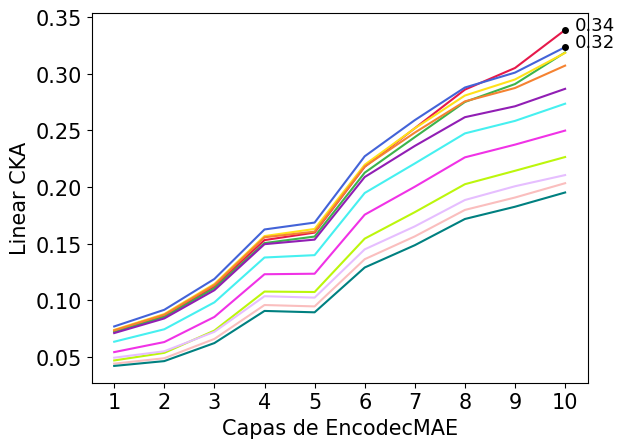

In [99]:
file_path = Path('experiment3_text_vs_audio/cka_encodecmae_mel256-ec-base_bert-base-uncased.json')

with file_path.open('r', encoding='utf-8') as file:
    bert_ec = json.load(file)
x = range(1, 10 + 1) 

# Set global font size
plt.rcParams.update({'font.size': 15}) 
cka_similarity_array = np.array(bert_ec)
for j in range(12):  
    plt.plot(x, cka_similarity_array[j, :], label=f'Capa {j + 1}', color=colors[j])

plt.plot(10, cka_similarity_array[0, 9], 'o', color='black', markersize=4)
plt.text(10.2, cka_similarity_array[0, 9], f'{cka_similarity_array[0, 9]:.2f}', fontsize=13, color='black')


plt.plot(10, cka_similarity_array[3, 9], 'o', color='black', markersize=4)
plt.text(10.2, cka_similarity_array[3, 9], f'{cka_similarity_array[3, 9]:.2f}', fontsize=13, color='black')


plt.xlabel("Capas de EncodecMAE")
plt.ylabel("Linear CKA")
plt.xticks(range(1, 10 + 1))
plt.show()

In [86]:
cka_similarity_array[5, 9]

0.2867003188355081

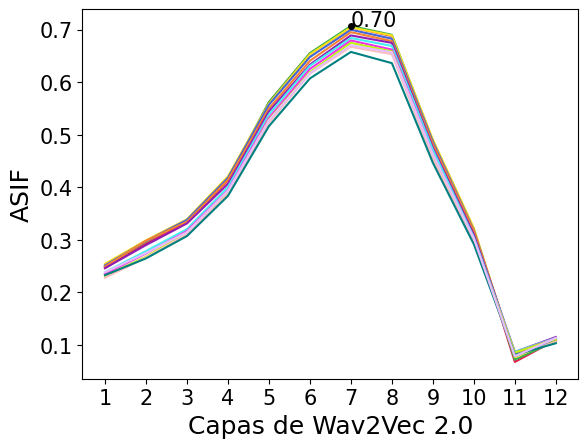

In [72]:
########## ASIF
def get_accuracy_top1(j=6, h=0, p=4, k=100):
    asif_value = 0
    with open(f'experiment3_text_vs_speech/retrieval_wav2vec2_layer{j}_bert-base-uncased_layer{h}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 

asif_similarity = np.zeros((12, 12))
for i_1 in range(12):
    for j_1 in range(12):
        asif_similarity[j_1, i_1] = get_accuracy_top1(j=i_1,h=j_1)[0]

x = range(1, 13) 
for j in range(12): 
    plt.plot(x, asif_similarity[j, :], label=f'Capa {j + 1}', color=colors[j])

plt.plot(7, asif_similarity[1, 6], 'o', color='black', markersize=4)
plt.text(7, asif_similarity[1, 6], f'{asif_similarity[0, 6]:.2f}', fontsize=15, color='black')

plt.xlabel("Capas de Wav2Vec 2.0", fontsize=18)
plt.ylabel("ASIF", fontsize=18)
plt.xticks(range(1, 13))

# plt.legend(title="Capas Modelo Audio 2.0", loc='upper left', bbox_to_anchor=(1,1))

plt.show()

In [70]:
asif_similarity

array([[0.24662402, 0.29253731, 0.3326226 , 0.41265103, 0.56133618,
        0.65444208, 0.7047619 , 0.68770434, 0.48756219, 0.31641791,
        0.06780384, 0.10959488],
       [0.25031983, 0.29694385, 0.33717129, 0.41563611, 0.56204691,
        0.65515281, 0.7068941 , 0.68997868, 0.48798863, 0.32025586,
        0.07206823, 0.10788913],
       [0.25444208, 0.29907605, 0.33916134, 0.42075338, 0.55906183,
        0.65273632, 0.70419332, 0.68869936, 0.4909737 , 0.32238806,
        0.07704335, 0.11002132],
       [0.25131485, 0.29751244, 0.33788202, 0.4177683 , 0.55692964,
        0.64776119, 0.69964463, 0.68258706, 0.48656716, 0.31783937,
        0.07874911, 0.11158493],
       [0.24918266, 0.29822317, 0.33461265, 0.41407249, 0.54982232,
        0.64051173, 0.6949538 , 0.67803838, 0.48230277, 0.31641791,
        0.08216063, 0.11385928],
       [0.24605544, 0.28997868, 0.33120114, 0.40639659, 0.54427861,
        0.63326226, 0.68884151, 0.67462687, 0.47562189, 0.30987918,
        0.08670931,

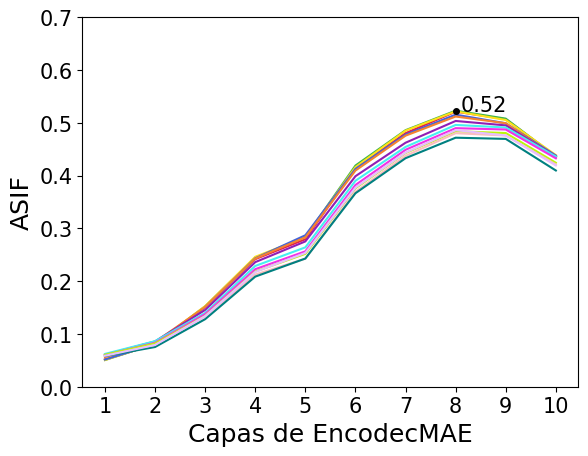

In [111]:
def get_accuracy_top1(j=6, h=0, p=6, k=250, model1='base', model2='bert-base-uncased'):
    asif_value = 0
    with open(f'experiment3_text_vs_audio/retrieval_{model1}_layer{j}_{model2}_layer{h}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 

asif_similarity1_mel = np.zeros((12, 10))
for i_1 in range(10):
    for j_1 in range(12):
        asif_similarity1_mel[j_1, i_1] = get_accuracy_top1(j=i_1, h=j_1, p=4, k=100, model1='mel256-ec-base', model2='bert-base-uncased')[0]

x = range(1, 11) 
for j in range(12): 
    plt.plot(x, asif_similarity1_mel[j, :], label=f'Capa {j + 1}', color=colors[j])

plt.plot(8, asif_similarity1_mel[1, 7], 'o', color='black', markersize=4)
plt.text(8.1,  asif_similarity1_mel[1, 7], f'{asif_similarity1_mel[0, 7]:.2f}', fontsize=15, color='black')
plt.xlabel("Capas de EncodecMAE", fontsize=18)
plt.ylabel("ASIF", fontsize=18)
plt.ylim((0, 0.7))
plt.xticks(range(1, 11))
# plt.legend(title="Capas Modelo Texto", loc='upper left', bbox_to_anchor=(1,1))

plt.show()        

In [66]:
asif_similarity1_mel

array([[0.05174129, 0.08045487, 0.15095949, 0.2416489 , 0.27945984,
        0.41449893, 0.48017058, 0.5209666 , 0.50660981, 0.4358209 ],
       [0.05060412, 0.08102345, 0.15223881, 0.24449183, 0.28343994,
        0.41890547, 0.48585643, 0.5228145 , 0.50774698, 0.43596304],
       [0.05046198, 0.08130775, 0.15266525, 0.24605544, 0.28315565,
        0.4159204 , 0.48500355, 0.52153518, 0.50518834, 0.43866382],
       [0.051457  , 0.08059701, 0.15053305, 0.24321251, 0.28685146,
        0.41250888, 0.47761194, 0.51528074, 0.4989339 , 0.4376688 ],
       [0.05586354, 0.08457711, 0.15095949, 0.24264392, 0.2830135 ,
        0.40938166, 0.47547974, 0.51172708, 0.49907605, 0.43468372],
       [0.06041222, 0.08585643, 0.14541578, 0.23596304, 0.27519545,
        0.39872068, 0.46211798, 0.50334044, 0.4949538 , 0.43653163],
       [0.06211798, 0.08628287, 0.13987207, 0.22871357, 0.26396588,
        0.39004975, 0.45415778, 0.49580668, 0.4909737 , 0.43596304],
       [0.06012793, 0.0832978 , 0.1374555

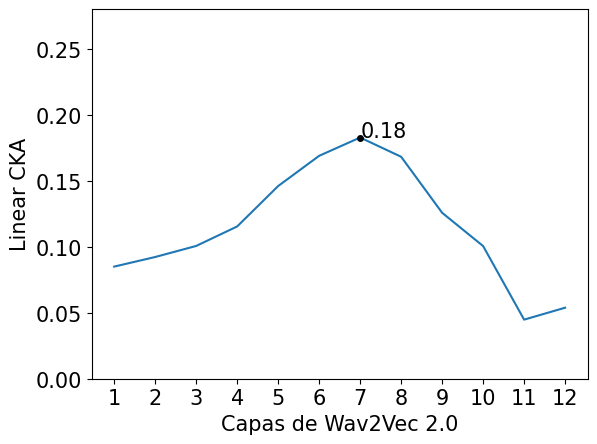

In [100]:
#################### GLOVE

file_path_line = Path('experiment3_text_vs_audio/cka_glove_encodecmae_mel256-ec-base.json')
with file_path_line.open('r', encoding='utf-8') as file:
    glove_bert_mel = json.load(file)    

file_path = Path('experiment1.1_CCA_CKA/cka_glove_wav2vec2.json')

with file_path.open('r', encoding='utf-8') as file:
    wav_vs_glove = json.load(file)    

x = range(1,13)
plt.plot(x, wav_vs_glove, label='wav_vs_glove')

plt.xlabel('Capas de Wav2Vec 2.0')
plt.ylabel('Linear CKA')
plt.xticks(range(1,13)) 
plt.plot(7, wav_vs_glove[6], 'o', color='black', markersize=4)
plt.text(7, wav_vs_glove[6], f'{wav_vs_glove[6]:.2f}', fontsize=15, color='black')
plt.ylim((0,0.28))
plt.show()    

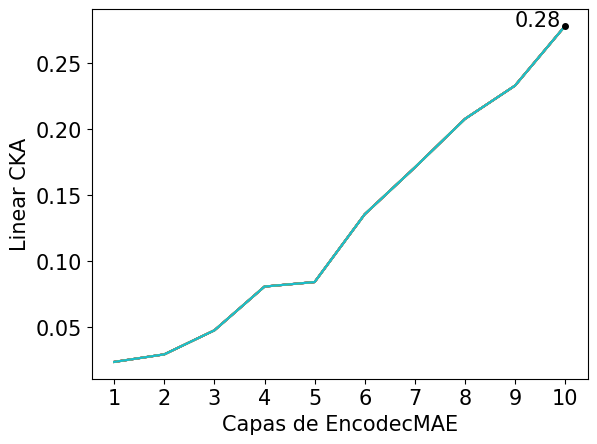

In [101]:
plt.plot(range(1, 11), glove_bert_mel, label='wav_vs_glove')

plt.xlabel('Capas de EncodecMAE')
plt.ylabel('Linear CKA')
plt.xticks(range(1,11)) 
plt.plot(10, glove_bert_mel[9][0], 'o', color='black', markersize=4)
plt.text(9, glove_bert_mel[9][0], f'{glove_bert_mel[9][0]:.2f}', fontsize=15, color='black')
plt.show()    